In [2]:
import pandas as pd
import numpy as np
import py3Dmol

from biopandas.pdb import PandasPdb

In [3]:
from protstruc.pdb import ChothiaAntibodyPDB

In [4]:
def visualize_antibody(
    pdb_fp,
    heavy_chain_id,
    light_chain_id,
    antigen_chain_ids = None,
    view_args={'width': 400, 'height': 400}
):
    with open(pdb_fp) as f:
        protein = ''.join([x for x in f])

    view = py3Dmol.view(**view_args)
    view.addModel(protein, 'pdb')

    view.setStyle({'chain': heavy_chain_id}, {'cartoon': {'color': 'cyan'}})
    view.setStyle({'chain': light_chain_id}, {'cartoon': {'color': 'magenta'}})
    if antigen_chain_ids is not None:
        for chid in antigen_chain_ids:
            view.setStyle({'chain': chid}, {'cartoon': {'color': 'grey'}})
    view.zoomTo()

    view.spin({'x': 2, 'y': 1.5, 'z': 1}, 0.5)
    view.show()

In [19]:
pdb_fp = '4uuj.pdb'
visualize_antibody(
    pdb_fp,
    heavy_chain_id='A',
    light_chain_id='B',
    antigen_chain_ids='C',
    view_args={'width': 300, 'height': 300}
)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Visualizing Fab, Fv and antigen

(-78.39299774169922, 33.999000549316406)

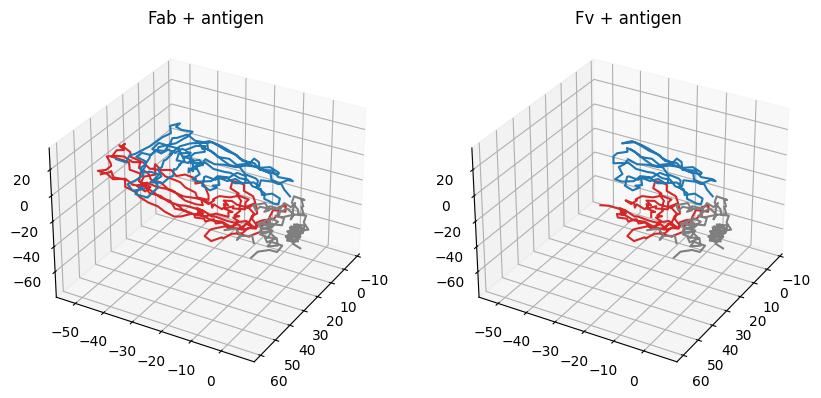

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.set_title('Fab + antigen')

pdb = ChothiaAntibodyPDB.read_pdb("4uuj.pdb", 'A', 'B', 'C', keep_fv_only=False)
atom_xyz, atom_xyz_mask = pdb.get_atom_xyz()

hmask = pdb.get_heavy_chain_mask()
lmask = pdb.get_light_chain_mask()
amask = pdb.get_antigen_mask()

for m, c in zip([hmask, lmask, amask], ['C3', 'C0', 'C7']):
    ax.plot(
        atom_xyz[m, 1, 0],
        atom_xyz[m, 1, 1],
        atom_xyz[m, 1, 2],
        c=c,
    )
ax.view_init(30, 30)
xlim, ylim, zlim = ax.get_xlim(), ax.get_ylim(), ax.get_zlim()

ax = fig.add_subplot(122, projection='3d')
ax.set_title('Fv + antigen')

pdb = ChothiaAntibodyPDB.read_pdb("4uuj.pdb", 'A', 'B', 'C', keep_fv_only=True)
atom_xyz, atom_xyz_mask = pdb.get_atom_xyz()

hmask = pdb.get_heavy_chain_mask()
lmask = pdb.get_light_chain_mask()
amask = pdb.get_antigen_mask()

for m, c in zip([hmask, lmask, amask], ['C3', 'C0', 'C7']):
    ax.plot(
        atom_xyz[m, 1, 0],
        atom_xyz[m, 1, 1],
        atom_xyz[m, 1, 2],
        c=c,
    )

ax.view_init(30, 30)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.set_zlim(*zlim)